# Assignment 8: Dimensionality Reduction

Dataset(s) needed: MNIST ("Modified National Institute of Standards and Technology") dataset.

# Learning Objectives
- Be able to make application decisions regarding principal component analysis to train and test data 
- Produce a dimensionality reduction model.

In [1]:
#Load the MNIST dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [2]:
X = mnist.data/255.0
y = mnist.target
print(X.shape, y.shape)

(70000, 784) (70000,)


In [3]:
import pandas as pd

# Converting sklearn.Bunch to Pandas dataframe
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df['y'] = y
# df['label'] = df['y'].apply(lambda i: str(i))
X, y = None, None
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 785 entries, pixel0 to y
dtypes: category(1), float64(784)
memory usage: 418.8 MB


In [5]:
df.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,0.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0
mean,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001308,0.000774,0.000390,0.000183,0.000065,0.000051,0.000007,0.0,0.0,0.0
std,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.031066,0.023495,0.016691,0.010917,0.006125,0.006093,0.001258,0.0,0.0,0.0
min,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
25%,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
50%,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
75%,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
max,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,0.996078,0.996078,0.992157,0.992157,0.996078,0.243137,0.0,0.0,0.0


In [6]:
# Check for null values
res = df.isnull().sum()
res[res > 0]

pixel0    70000
dtype: int64

In [7]:
# Replace NaN's with 0's
df['pixel0'] = df['pixel0'].fillna(0)

Question 1: Split the data into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing).

In [8]:
X = df.drop('y', axis=1)
y = df['y']

X_train = X.iloc[:60000,:]
X_test = X.iloc[60000:,:]

y_train = y.iloc[:60000]
y_test = y.iloc[60000:]

Question 2: Train a Logistic Regression classifier on the dataset. Set solver = lbfgs and random_state = 42. Hint you might also want to think about the multi_class parameter and if you need to set that.  You want to track how long the model takes to run.

In [9]:
from sklearn.linear_model import LogisticRegression
import time

start_time = time.process_time()
lr_simple = LogisticRegression(solver='lbfgs', random_state=42, multi_class='multinomial', max_iter=1000).fit(X_train, y_train.values.ravel())
end_time = time.process_time()
time_simple = end_time - start_time
print("Total Estimation Running Time:", time_simple, "Seconds")

Total Estimation Running Time: 407.571038 Seconds


Question 3: Evaluate the resulting model on the test set.

In [10]:
# Use score method to get accuracy of model
from sklearn.metrics import accuracy_score

y_pred_lr_simple = lr_simple.predict(X_test)
acc_lr_simple = accuracy_score(y_test, y_pred_lr_simple)
print("Accuracy: ", acc_lr_simple)

Accuracy:  0.9256


Question 4: Use PCA to reduce the dataset's dimensionality, with an explained variance ratio of 95%.

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
pca_train = pca.fit_transform(X_train)
pca_test = pca.transform(X_test)

Question 5: Train a new Logistic Regression classifier on the reduced dataset and see how long it takes. Use the same criteria as before just with PCA. Was training much faster? Explain your results

In [12]:
start_time = time.process_time()
lr_pca = LogisticRegression(solver='lbfgs', random_state=42, multi_class='multinomial', max_iter=1000).fit(pca_train, y_train.values.ravel())
end_time = time.process_time()
time_pca = end_time - start_time
print("Total Estimation Running Time:", time_pca, "Seconds")

Total Estimation Running Time: 65.389947 Seconds


In [13]:
y_pred_lr_pca = lr_pca.predict(pca_test)
acc_lr_pca = accuracy_score(y_test, y_pred_lr_pca)
print("Accuracy: ", acc_lr_pca)

Accuracy:  0.9233


Trying out scaling the data with PCA and Logistic Regression

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
pca = PCA(n_components=0.95)
pca_train = pca.fit_transform(X_train)
pca_test = pca.transform(X_test)
pca_train.shape

(60000, 154)

In [16]:
start_time = time.process_time()
lr_sc_pca = LogisticRegression(solver='lbfgs', random_state=42, multi_class='multinomial', max_iter=1000).fit(pca_train, y_train.values.ravel())
end_time = time.process_time()
time_sc_pca = end_time - start_time
print("Total Estimation Running Time:", time_sc_pca, "Seconds")

Total Estimation Running Time: 61.73062099999993 Seconds


In [17]:
y_pred_lr_sc_pca = lr_sc_pca.predict(pca_test)
acc_lr_sc_pca = accuracy_score(y_test, y_pred_lr_sc_pca)
print("Accuracy: ", acc_lr_sc_pca)

Accuracy:  0.9233


Looking at F1 performance metrics for all 3 models

In [18]:
from sklearn.metrics import f1_score

f1_simple = f1_score(y_test, y_pred_lr_simple, average=None)
f1_pca = f1_score(y_test, y_pred_lr_pca, average=None)
print("F1 LR:", f1_simple, "F1 PCA LR:", f1_pca)

F1 LR: [0.96367306 0.96985583 0.91490408 0.90998524 0.93740458 0.88295455
 0.94753247 0.92661448 0.87917738 0.91304348] F1 PCA LR: [0.96221662 0.97155361 0.91078431 0.90325765 0.92940579 0.8847032
 0.94447327 0.92797648 0.88433982 0.90351311]


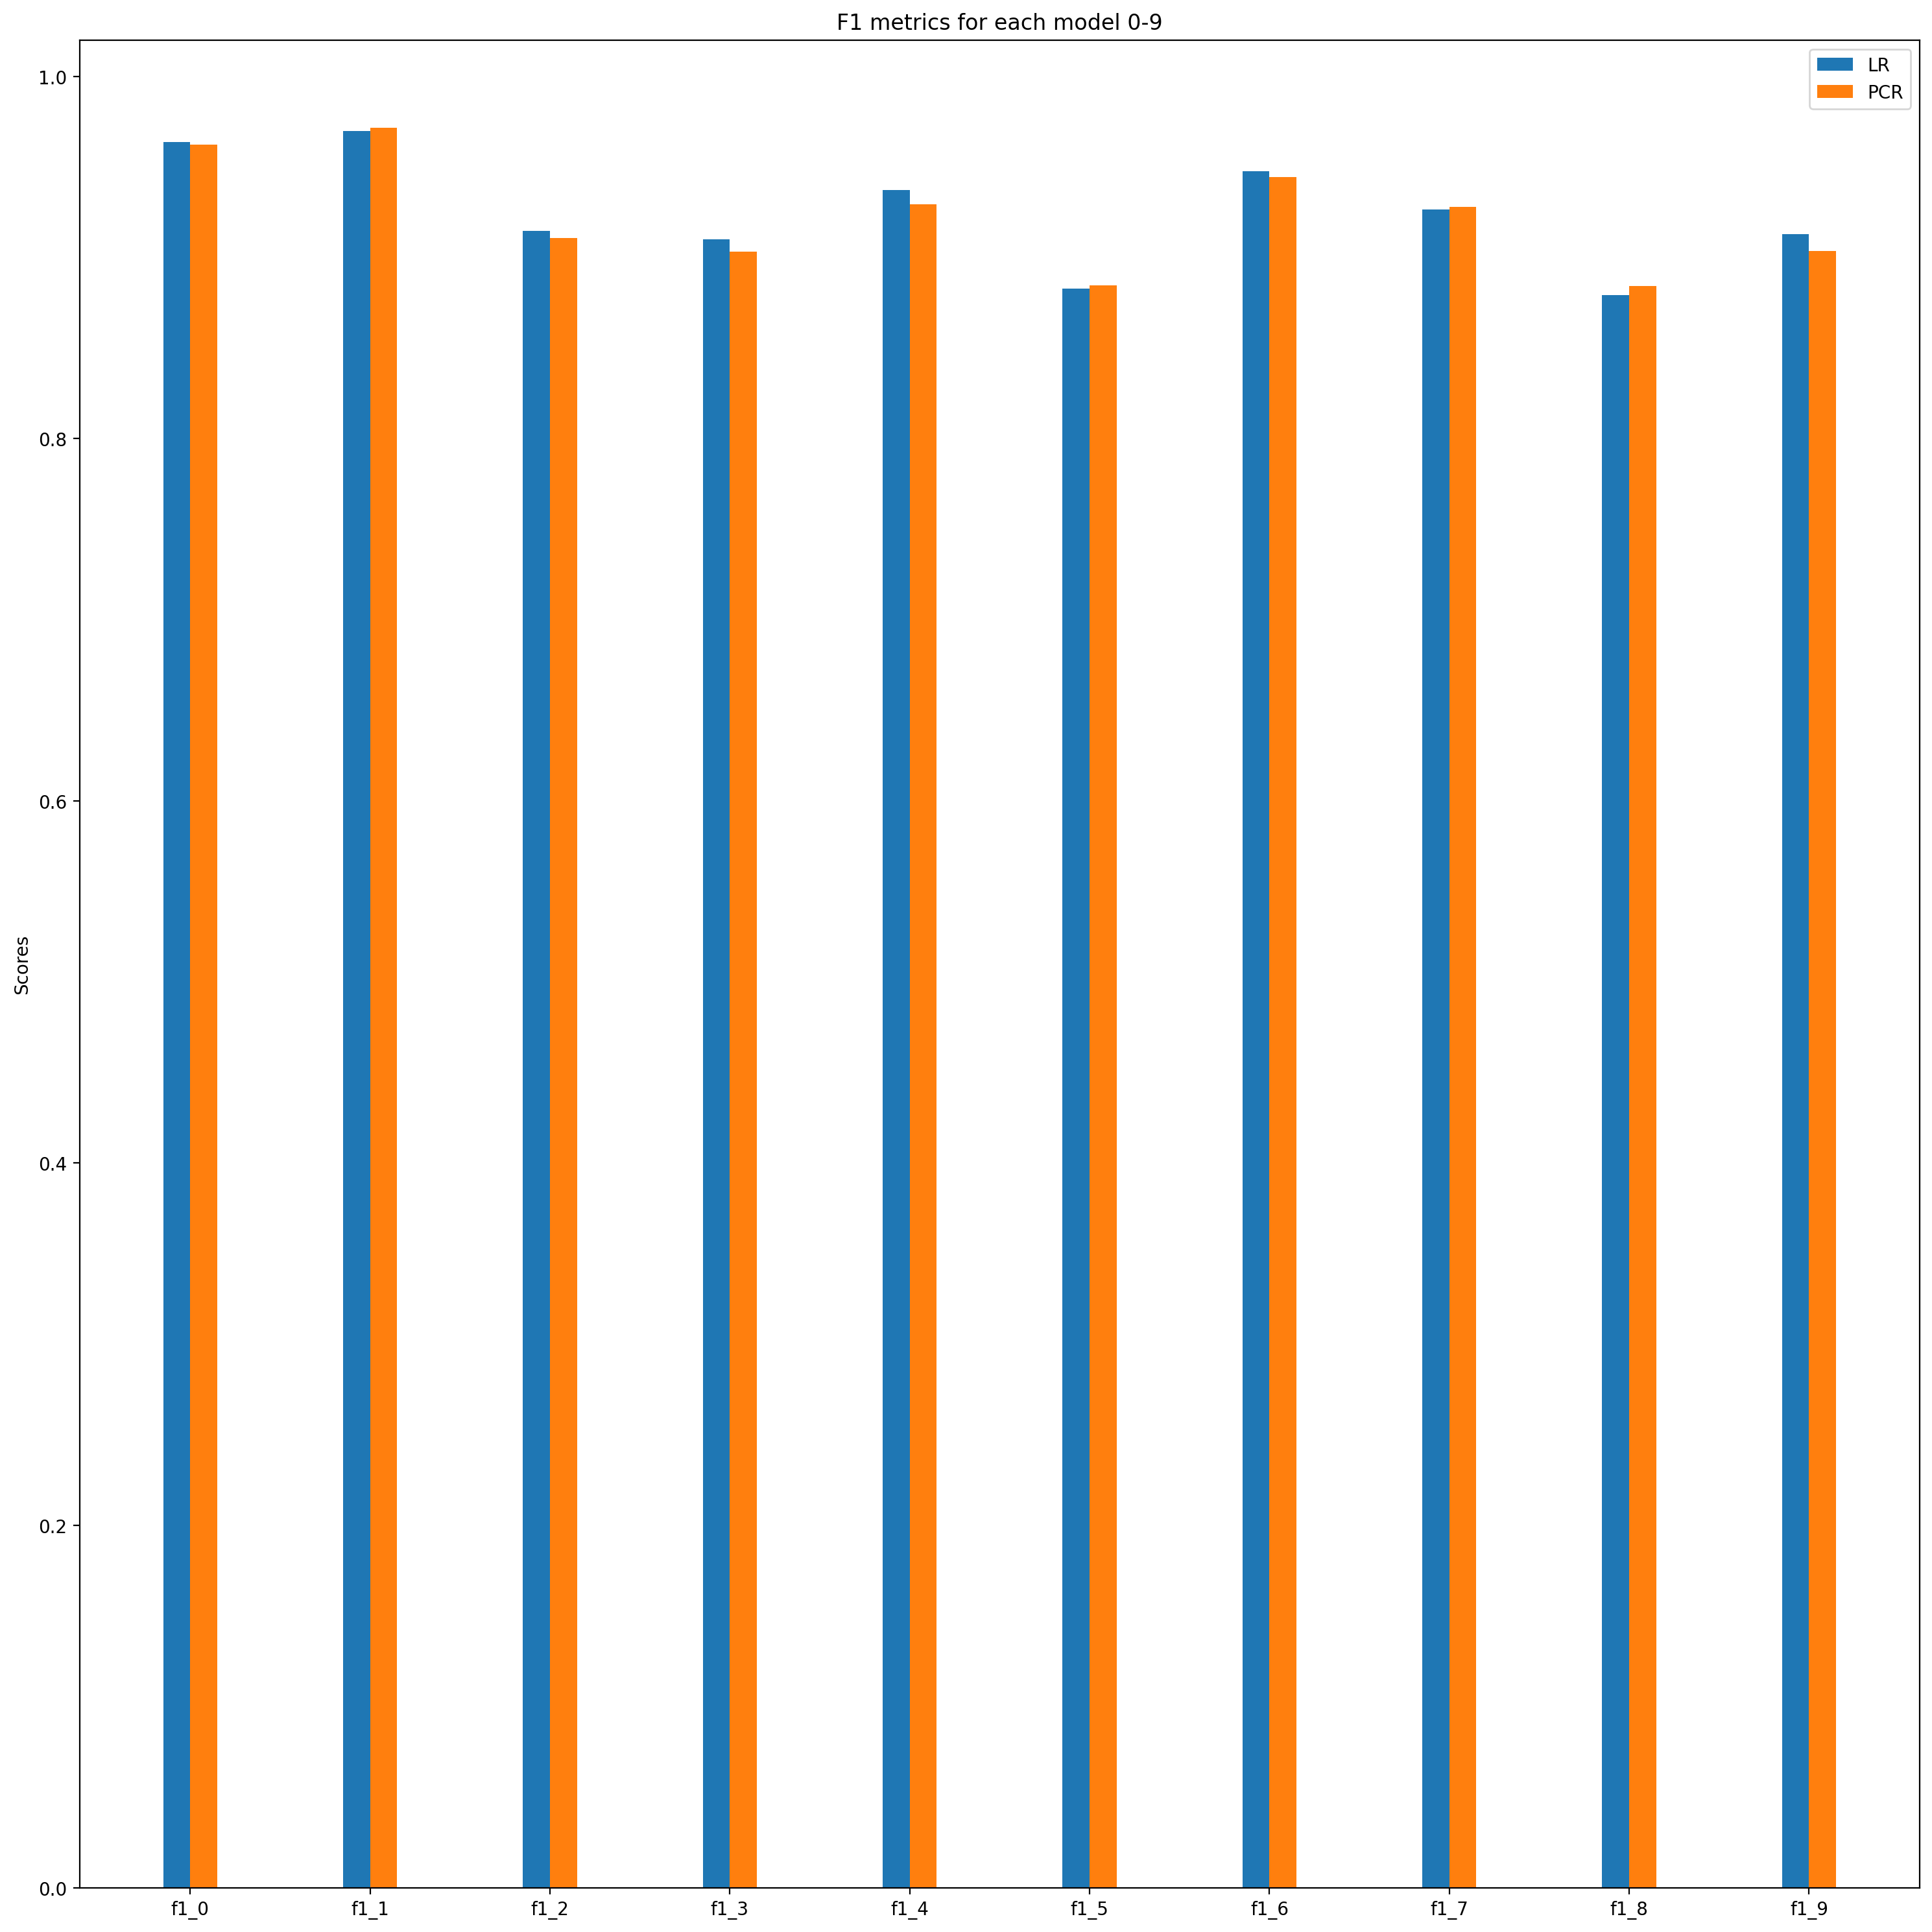

In [19]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.rcParams['figure.figsize'] = [15, 15]
plt.rcParams['figure.dpi'] = 200

scores = ('f1_0', 'f1_1', 'f1_2', 'f1_3', 'f1_4', 'f1_5', 'f1_6', 'f1_7', 'f1_8', 'f1_9')

x = np.arange(len(scores))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, f1_simple, width, label='LR')
rects2 = ax.bar(x + width/2, f1_pca, width, label='PCR')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('F1 metrics for each model 0-9')
ax.set_xticks(x)
ax.set_xticklabels(scores)
ax.legend()

fig.tight_layout()

plt.show()

Question 6: Evaluate the new classifier on the test set: how does it compare to the previous classifier? Discuss the speed / accuracy trade-off and in which case you'd prefer a very slight drop in model performance for a x-time speedup in training.

I'll only be comparing simple logistic regression with PCR (PCA+LR) models and ignore the scaled PRC results as its only (marginal) advantage is that it trains 2 seconds faster than its PCR without scaling counterpart.

Below is the comparative metrics performance graph. PCR trains 83.6% faster than the simple LR model but accuracy reduces by 0.3%. The features reduced from 784 to 154 (by 80.35%) through PCA. 

In most cases a drop in accuracy of 0.3% for an increased model training speed by 83.6% would be preferable except in specialized cases where training speed doesn't matter as much as accuracy.

Also, taking a look at the F1 comparative graph above, PCR (PCA+LR) model does slightly better at correctly classifying 1's, 5's, 7's and 8's. 

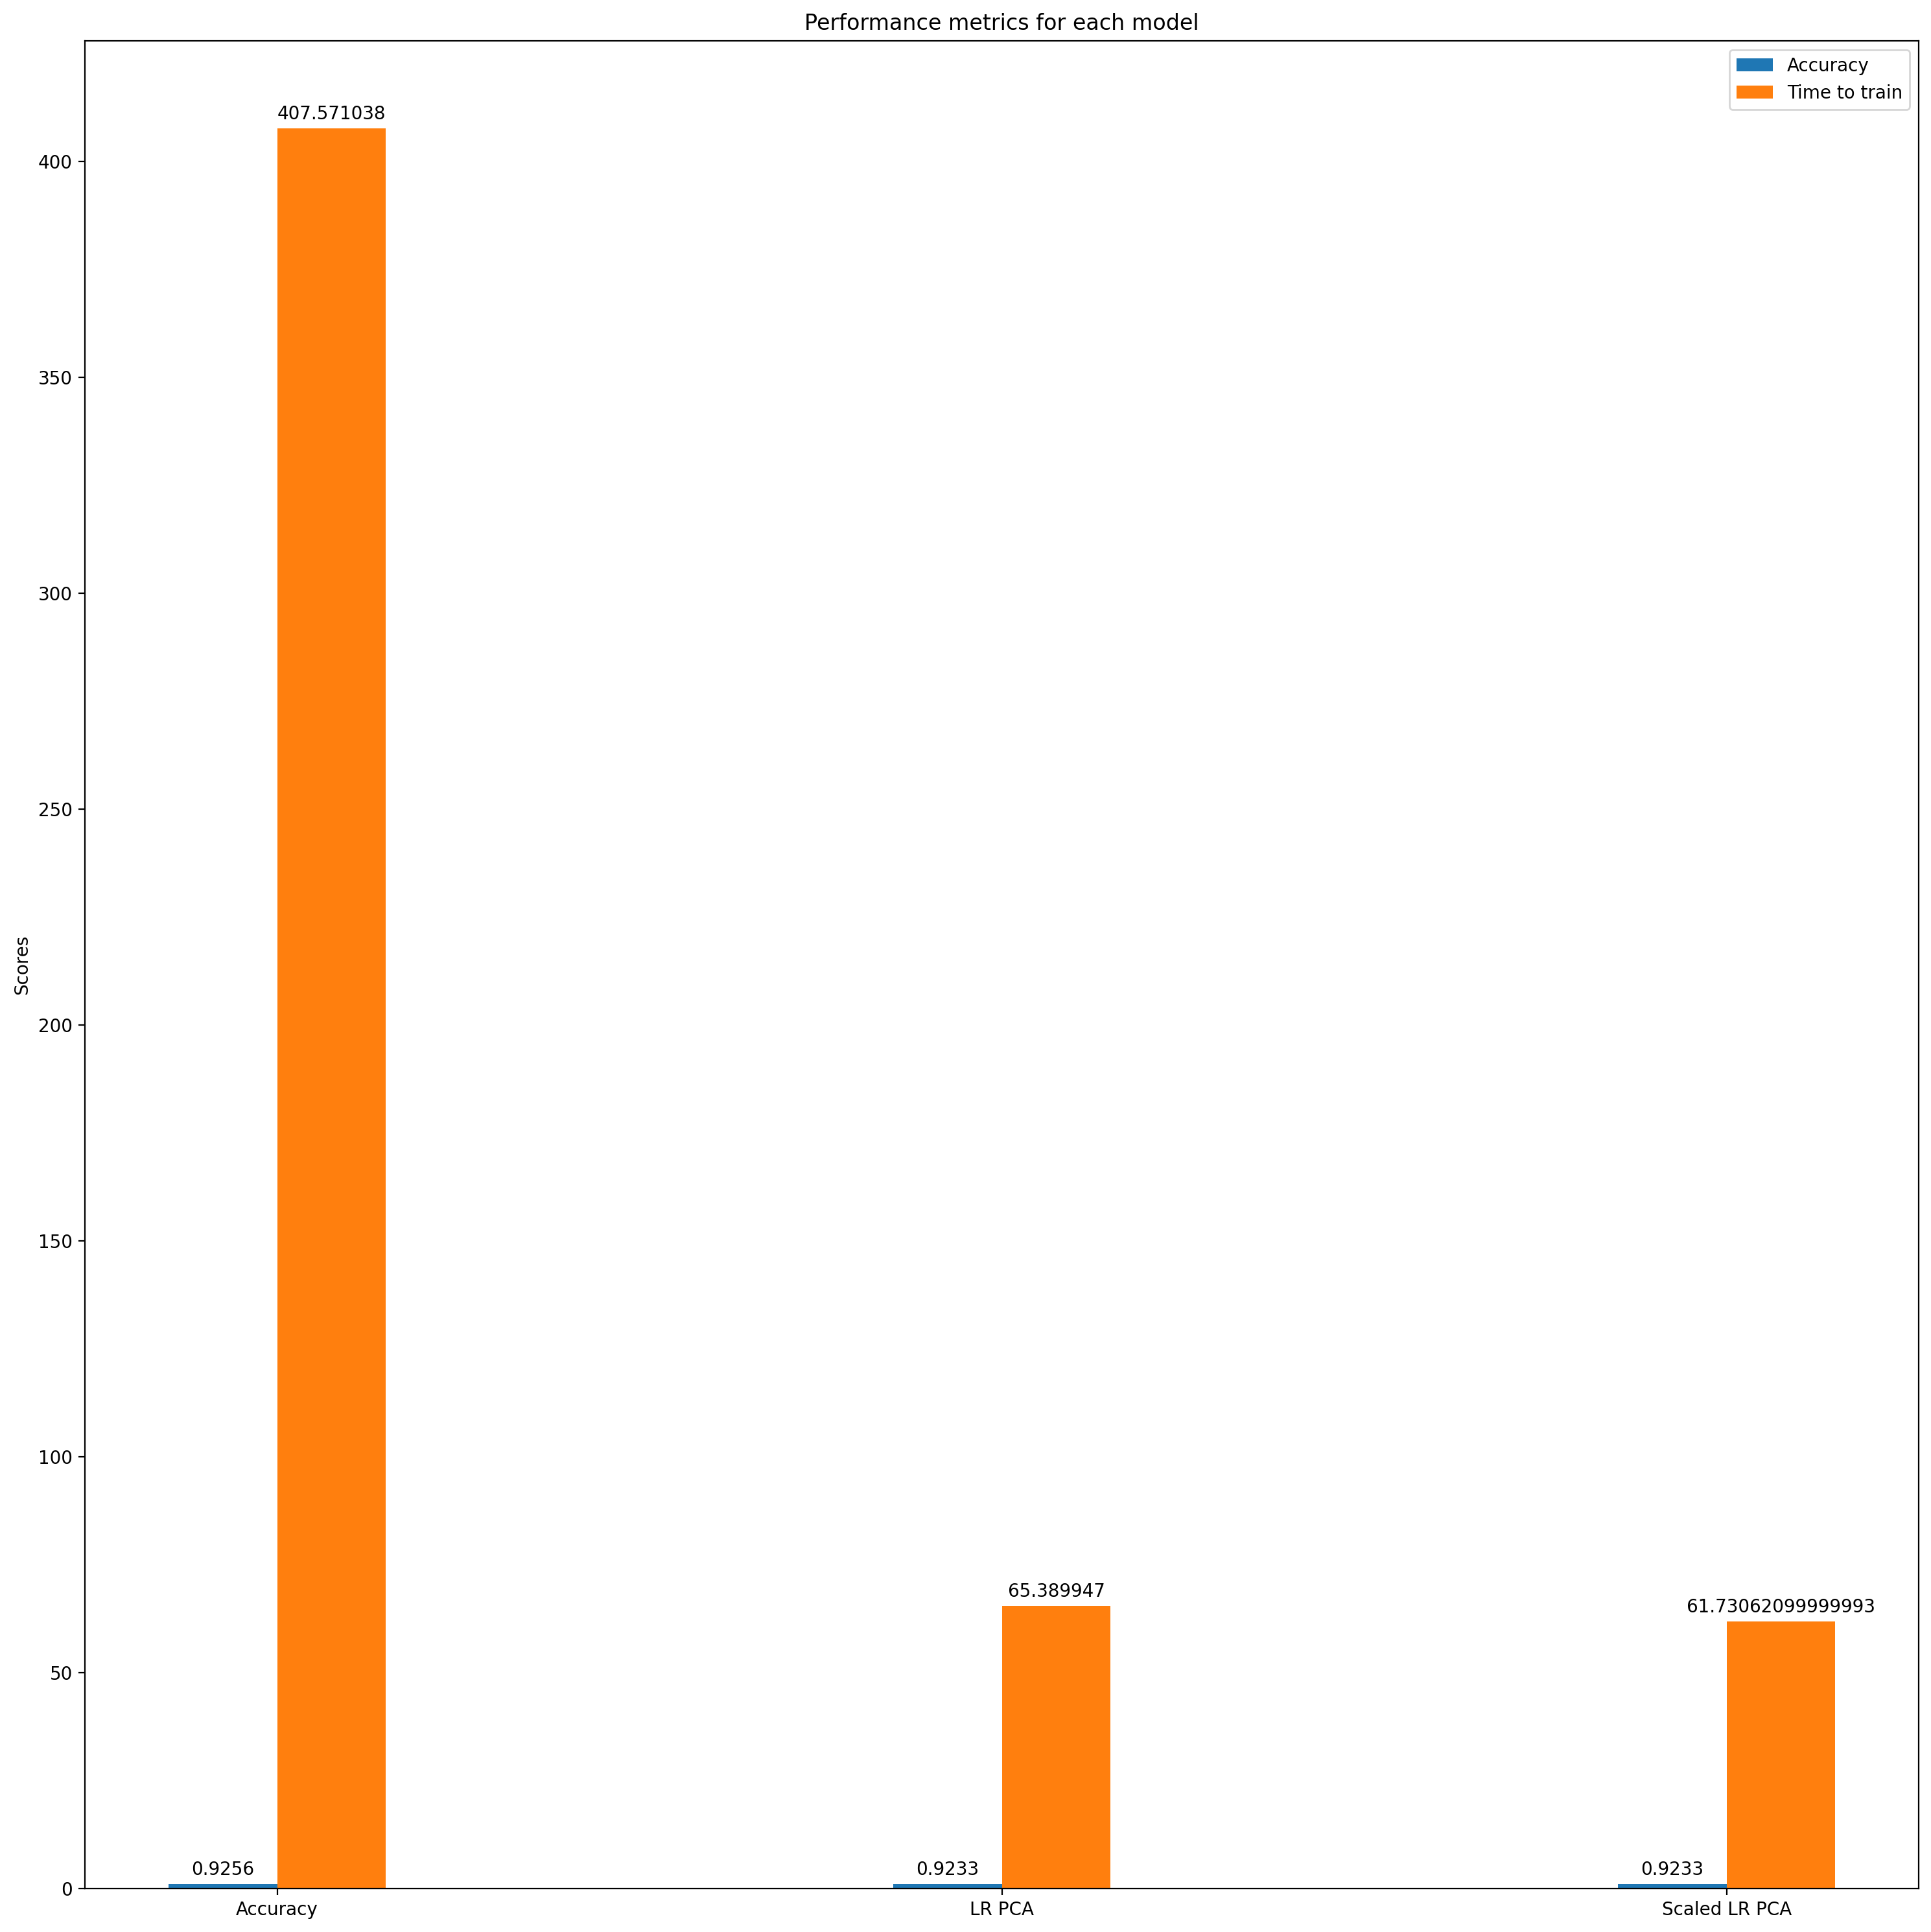

In [20]:
plt.rcParams['figure.figsize'] = [15, 15]
plt.rcParams['figure.dpi'] = 200

models = ('Accuracy', "LR PCA", "Scaled LR PCA")
accuracy = [acc_lr_simple, acc_lr_pca, acc_lr_sc_pca]
time_taken = [time_simple, time_pca, time_sc_pca]

x = np.arange(len(models))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, accuracy, width, label='Accuracy')
rects2 = ax.bar(x + width/2, time_taken, width, label='Time to train')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Performance metrics for each model')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

Question 7. Create a new text cell in your Notebook: Complete a 50-100 word summary (or short description of your thinking in applying this week's learning to the solution) of your experience in this assignment. Include: What was your incoming experience with this model, if any? what steps you took, what obstacles you encountered. how you link this exercise to real-world, machine learning problem-solving. (What steps were missing? What else do you need to learn?) This summary allows your instructor to know how you are doing and allot points for your effort in thinking and planning, and making connections to real-world work.

Incoming experience: No incoming experience apart from previous assignments
Steps taken: This week's lesson was about dimensionality reduction using PCA, PCR, t-SNE. Implemented PCA and PCR methods on the data set to get a deeper understanding of the concepts
Obstacles: This week's obstacle was understanding PCA, getting an intuition for it and understanding what Scikit Learn's PCA function returned
Link to real world: Helped me understand how PCA works, what the tradeoffs are with reduction in dimensions.
Steps missing (with just this week's learning): Might be useful to compare Lasso, Ridge, Elasticnet, forward, backward and hybrid feature selectors with PCA and PCR.